### Importing the necessary libraries

In [138]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# load breast cancer dataset
cancer_data = load_breast_cancer()

pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Spliting the Datasets (Train 80%, Test 20%)

In [89]:
# data split using train_test_split(), train_size=0.8 sets 80% train size and 20% test size, set random_state = 42 for consistent dataset
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, train_size=0.8, random_state=42)

### Standardizing the Datasets

In [91]:
# Defining Standardizing Scaler and fitting it with training dataset
standard_scaler = StandardScaler().fit(X_train)

# Standardizing the dataset
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_test = standard_scaler.transform(X_test)

### KNN Classifier

In [92]:
# K-Nearest-Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_train, y_train)
knn_pred = knn.predict(X_scaled_test)


### Decision Tree Classifier

In [93]:
# Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_scaled_train, y_train)
dt_pred = dt.predict(X_scaled_test)


### Random Forest Classifier

In [94]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_scaled_train, y_train)
rf_pred = rf.predict(X_scaled_test)

### Accuracy for each Classifier

In [181]:
# Accuracy for each classifier
knn_acc = accuracy_score(y_test, knn_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Accuracy for Each Calssifier \n=================================")
print(f"KNN Classifier: {knn_acc:.4f}")
print(f"Decisino Tree Classifier: {dt_acc:.4f}")
print(f"Random Forest Classifier: {rf_acc:.4f}")

Accuracy for Each Calssifier 
KNN Classifier: 0.9474
Decisino Tree Classifier: 0.9298
Random Forest Classifier: 0.9649


### Precision for each classifier

In [130]:
# Precision for each classifier
knn_prec = precision_score(y_test, knn_pred)
dt_prec = precision_score(y_test, dt_pred)
rf_prec = precision_score(y_test, rf_pred)

print(f"Precision for Each Calssifier \n=================================")
print(f"KNN Classifier: {knn_prec:.4f}")
print(f"Decisino Tree Classifier: {dt_prec:.4f}")
print(f"Random Forest Classifier: {rf_prec:.4f}")

Precision for Each Calssifier 
KNN Classifier: 0.9577
Decisino Tree Classifier: 0.9437
Random Forest Classifier: 0.9589


### Recall for each classifier

In [136]:
# Recall for each classifier
knn_rec = recall_score(y_test, knn_pred)
dt_rec = recall_score(y_test, dt_pred)
rf_rec = recall_score(y_test, rf_pred)


print(f"Recall for Each Calssifier \n=================================")
print(f"KNN Classifier: {knn_rec:.4f}")
print(f"Decisino Tree Classifier: {dt_rec:.4f}")
print(f"Random Forest Classifier: {rf_rec:.4f}")

Recall for Each Calssifier 
KNN Classifier: 0.9577
Decisino Tree Classifier: 0.9437
Random Forest Classifier: 0.9859


### F1 Score for each classifier

In [131]:
# F1 Score for each classifier
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"F1 Score for Each Calssifier \n=================================")
print(f"KNN Classifier: {knn_f1:.4f}")
print(f"Decisino Tree Classifier: {dt_f1:.4f}")
print(f"Random Forest Classifier: {rf_f1:.4f}")

F1 Score for Each Calssifier 
KNN Classifier: 0.9577
Decisino Tree Classifier: 0.9437
Random Forest Classifier: 0.9722


### KNN Classifier Confusion Matrix

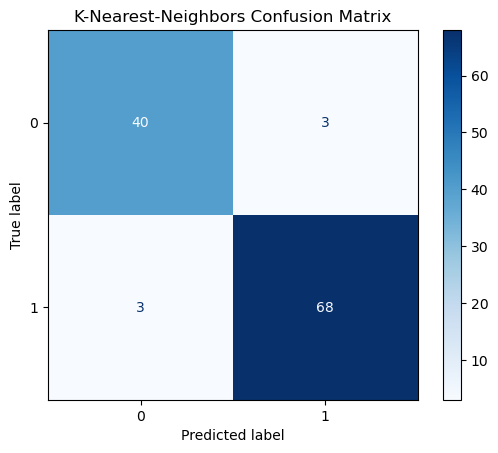

In [178]:
# KNN Classifier Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('K-Nearest-Neighbors Confusion Matrix')
_ = plt.show()


### Decision Tree Confusion Matrix

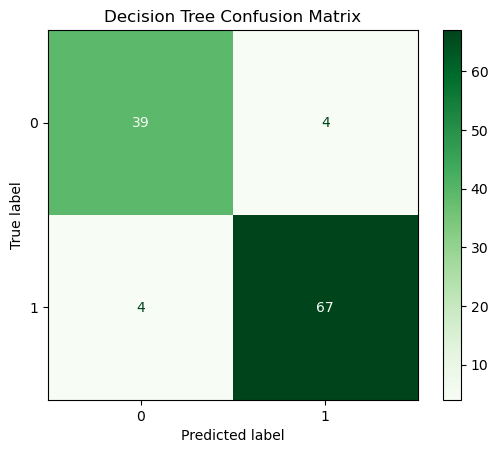

In [179]:
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
dt_disp.plot(cmap=plt.cm.Greens)
plt.title('Decision Tree Confusion Matrix')
_ = plt.show()

### Random Forest Confusion Matrix

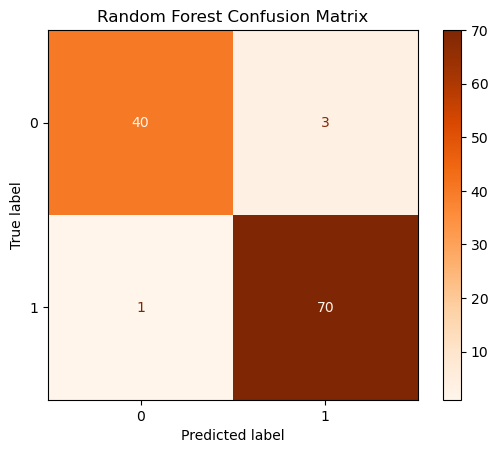

In [180]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot(cmap=plt.cm.Oranges)
plt.title('Random Forest Confusion Matrix')
_ = plt.show()

### Ablation Study: KNN Classifier (Different n_neighbors values)

In [283]:
knn_accs = []
knn_precs = []
knn_recs = []
knn_f1s = []
num_neighbors = [1, 5, 10, 20, 50, 100, 200]

for num in num_neighbors:
    new_knn_clf = KNeighborsClassifier(n_neighbors=num).fit(X_scaled_train, y_train)
    new_knn_pred = new_knn_clf.predict(X_scaled_test)
    
    knn_accs.append(accuracy_score(y_test, new_knn_pred))
    knn_precs.append(precision_score(y_test, new_knn_pred))
    knn_recs.append(recall_score(y_test, new_knn_pred))
    knn_f1s.append(f1_score(y_test, new_knn_pred))



In [300]:
knn_abl = pd.DataFrame({'accuracy': knn_accs, 'precision': knn_precs, 'recall': knn_recs, 'f1': knn_f1s}, index=num_neighbors)
print("Ablation Study: K-Nearest-Neighbors (n_neighbors)")
display(knn_abl)

Ablation Study: K-Nearest-Neighbors (n_neighbors)


,accuracy,precision,recall,f1
1,0.938596,0.944444,0.957746,0.951049
5,0.947368,0.957746,0.957746,0.957746
10,0.956140,0.971429,0.957746,0.964539
20,0.956140,0.958333,0.971831,0.965035
50,0.956140,0.945946,0.985915,0.965517
100,0.947368,0.922078,1.000000,0.959459
200,0.885965,0.845238,1.000000,0.916129


### Ablation Study: Decision Tree (Different max_depth)

In [315]:
dt_accs = []
dt_precs = []
dt_recs = []
dt_f1s = []
dt_max_depths = [None, 5, 10, 15, 20, 25, 30]

for depth in dt_max_depths:
    new_dt_clf = DecisionTreeClassifier(max_depth=depth).fit(X_scaled_train, y_train)
    new_dt_pred = new_dt_clf.predict(X_scaled_test)
    
    dt_accs.append(accuracy_score(y_test, new_dt_pred))
    dt_precs.append(precision_score(y_test, new_dt_pred))
    dt_recs.append(recall_score(y_test, new_dt_pred))
    dt_f1s.append(f1_score(y_test, new_dt_pred))



In [316]:
dt_abl = pd.DataFrame({'accuracy': dt_accs, 'precision': dt_precs, 'recall': dt_recs, 'f1': dt_f1s}, index=['None (default)']+dt_max_depths[1:])
print("Ablation Study: Decision Tree (max_depth)")
display(dt_abl)

Ablation Study: Decision Tree (max_depth)


,accuracy,precision,recall,f1
None (default),0.938596,0.957143,0.943662,0.950355
5,0.938596,0.944444,0.957746,0.951049
10,0.938596,0.944444,0.957746,0.951049
15,0.938596,0.944444,0.957746,0.951049
20,0.938596,0.944444,0.957746,0.951049
25,0.938596,0.957143,0.943662,0.950355
30,0.938596,0.944444,0.957746,0.951049


### Ablation Study: Random Forest (Different max_depth)

In [313]:
rf_accs = []
rf_precs = []
rf_recs = []
rf_f1s = []
rf_max_depths = [None, 5, 10, 15, 20, 25, 30]

for depth in rf_max_depths:
    new_rf_clf = RandomForestClassifier(max_depth=depth).fit(X_scaled_train, y_train)
    new_rf_pred = new_rf_clf.predict(X_scaled_test)
    
    rf_accs.append(accuracy_score(y_test, new_rf_pred))
    rf_precs.append(precision_score(y_test, new_rf_pred))
    rf_recs.append(recall_score(y_test, new_rf_pred))
    rf_f1s.append(f1_score(y_test, new_rf_pred))


In [314]:
rf_abl = pd.DataFrame({'accuracy': rf_accs, 'precision': rf_precs, 'recall': rf_recs, 'f1': rf_f1s}, index=['None (default)']+rf_max_depths[1:])
print("Ablation Study: Random Forest (max_depth)")
display(rf_abl)

Ablation Study: Random Forest (max_depth)


,accuracy,precision,recall,f1
None (default),0.964912,0.958904,0.985915,0.972222
5,0.964912,0.958904,0.985915,0.972222
10,0.964912,0.958904,0.985915,0.972222
15,0.964912,0.958904,0.985915,0.972222
20,0.956140,0.958333,0.971831,0.965035
25,0.956140,0.958333,0.971831,0.965035
30,0.964912,0.958904,0.985915,0.972222
